In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

from scipy.stats import binned_statistic

In [2]:
baseline_file = '../../baseline/baseline_v2.0_10yrs.db'
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
# The point on the sky we would like to get visits for
ra = [268.708]
dec = [-28.975]


# Say we just want to pass data through, not compute anything. Documentation on the columns coming soon.
metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
# Select all the visits
sql = ''
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name))

In [4]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldDec', 'fieldRA', 'rotSkyPos', 'filter'].
Found 2086980 visits
Running:  ['baseline_v2_0_10yrs_Pass_filter_observationStartMJD_fiveSigmaDepth_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [12]:
seasons = rsUtils.calcSeason(ra[0], bundleList[0].metricValues[0]['observationStartMJD'])

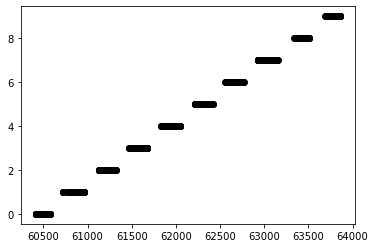

In [16]:
plt.plot(bundleList[0].metricValues[0]['observationStartMJD'], np.floor(seasons), 'ko')

In [26]:
# Let's find the median observation date per seasons and pretend that's a good enough time to center on
med_seasons, _be, _bn = binned_statistic(np.floor(seasons),
                               bundleList[0].metricValues[0]['observationStartMJD'], statistic=np.median, bins=np.arange(11)-0.5)

In [27]:
med_seasons

array([60490.12357955, 60857.66536103, 61234.22234534, 61575.30992273,
       61944.2970125 , 62324.81682753, 62676.13006456, 63067.62450042,
       63437.04333752, 63784.09550157])